In [1]:
# import os
# from ..root_path import p
# os.chdir(os.path.dirname(p))
# print(os.getcwd())

from datetime import datetime


from src.issues import BEDTIME_NEWS
from src.removed import REMOVED_ANNOTAIONS

In [2]:
%config InlineBackend.figure_format='svg'

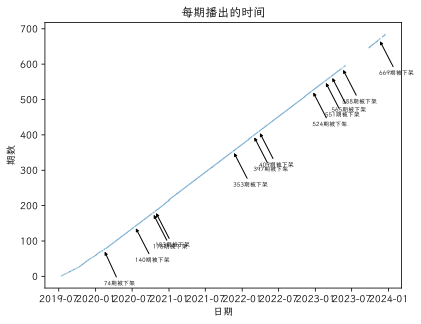

In [3]:
# setup matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams["font.sans-serif"] = ["LXGW WenKai"]
plt.title("每期播出的时间")
plt.xlabel("日期")
plt.ylabel("期数")


plt.scatter(
    x=[datetime.fromtimestamp(issue["created"]) for issue in BEDTIME_NEWS],
    y=[float(issue["issue"]) for issue in BEDTIME_NEWS],
    s=0.02,
)


for y, x in REMOVED_ANNOTAIONS:
    plt.annotate(
        xy=(datetime.fromtimestamp(x), int(y)),
        text=f"{int(y)-1}期被下架",
        xytext=(datetime.fromtimestamp(x), int(y) - 100),
        arrowprops=dict(arrowstyle="-|>", color="k"),
        fontsize=6
    )
    pass

plt.show()

可见，在2023年夏天“放暑假”前，马督工并没有被长时间禁言。

最近他还放了个小寒假，在图上清晰可见，已经无需特别标注了。

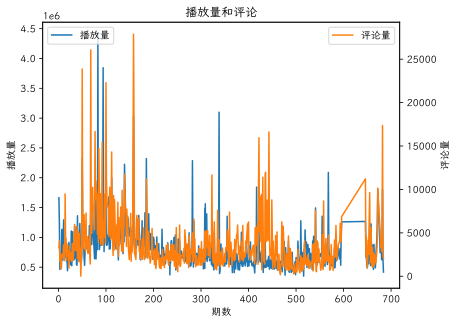

In [4]:
import pandas as pd

fig, ax = plt.subplots()
ax.set_title("播放量和评论")

ax.set_xlabel("期数")
ax.set_ylabel("播放量")

PD_BEDTIME_NEWS = pd.read_json("bedtime_news.json")

ax.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["play"],
    label="播放量",
    color="tab:blue",
    # alpha=0.5,
)

ax2 = ax.twinx()
ax2.set_ylabel("评论量")

ax2.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["comment"],
    label="评论量",
    color="tab:orange",
    # alpha=0.5,
)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
# ax.plot(
#     [float(issue["issue"]) for issue in BEDTIME_NEWS],
#     [issue["play"] for issue in BEDTIME_NEWS],
#     label="播放量",
#     color="tab:blue",
# )

唔……没有什么结论。

下面我们分析文本：关注的人物、地区变化趋势。（主题？放弃算了）

In [11]:
from src.geo_result import GEO
from collections import Counter
from typing import Callable
from pprint import pprint

# PD_GEO = pd.DataFrame.from_records(GEO, index="issue")


def concat[T](l: list[list[T]]) -> list[T]:
    return [i for j in l for i in j]

def counter[T](l: list[T]) -> dict[T, int]:
    d: dict[T, int] = {}
    for i in l:
        if i not in d:
            d[i] = 0
        d[i] += 1
    return d

def count_mean[T](l: list[list[T]]) -> dict[T, float]:
    d: dict[T, int] = {}
    for i in concat(l):
        if i not in d:
            d[i] = 0
        d[i] += 1
    return {k: d[k] / len(l) for k in d}


def groupby[T, K](l: list[T], f: Callable[[T], K]) -> dict[K, list[T]]:
    d: dict[K, list[T]] = {}
    for i in l:
        k = f(i)
        if k not in d:
            d[k] = []
        d[k].append(i)
    return d


# 计算平均每一百期，每个国家/省份出现的频率
g = groupby(GEO, lambda i: i["issue"] // 100)
# pprint(g)
g1 = {
    k: {
        "country": count_mean([i["country"] for i in g[k]]),
        "province": count_mean([i["province"] for i in g[k]]),
    }
    for k in g
}
pprint(g1)

# g = PD_GEO.groupby(lambda i: i//100)
# g.describe()
# print(g.apply(lambda df: Counter(concat(df["geo"]))))
# g.transform(lambda x: concat(x))
# g.describe()

# 折线图
# df.plot(
#     y="北京",
#     label="北京",
#     color="tab:blue",
#     alpha=0.5,
# )

# fig, ax = plt.subplots()
# ax.set_title("省份和国家的平均出场次数")

# ax.set_xlabel("期数")

{0: {'country': {'中国': 0.9900990099009901,
                 '丹麦': 0.0297029702970297,
                 '乌克兰': 0.039603960396039604,
                 '乌兹别克斯坦': 0.009900990099009901,
                 '也门': 0.04950495049504951,
                 '以色列': 0.0594059405940594,
                 '伊朗': 0.0891089108910891,
                 '俄罗斯': 0.21782178217821782,
                 '保加利亚': 0.009900990099009901,
                 '利比亚': 0.0594059405940594,
                 '加拿大': 0.09900990099009901,
                 '卢旺达': 0.019801980198019802,
                 '印度': 0.25742574257425743,
                 '印度尼西亚': 0.009900990099009901,
                 '古巴': 0.009900990099009901,
                 '哈萨克斯坦': 0.009900990099009901,
                 '土耳其': 0.04950495049504951,
                 '坦桑尼亚': 0.009900990099009901,
                 '埃及': 0.04950495049504951,
                 '埃塞俄比亚': 0.0297029702970297,
                 '塞浦路斯': 0.009900990099009901,
                 '墨西哥': 0.039603960396039604,
 

In [17]:
# 将 g1 转换为 DataFrame
# 先画国家
df = pd.DataFrame({k: v["country"] for k, v in g1.items()}).T
df.head()

,美国,韩国,日本,中国,加拿大,非洲,俄罗斯,法国,意大利,英国,...,约旦,土库曼斯坦,巴勒斯坦,斯里兰卡,海地,吉尔吉斯斯坦,东盟,塞尔维亚,几内亚,梵蒂冈
0,0.722772,0.326733,0.475248,0.990099,0.099010,0.178218,0.217822,0.267327,0.158416,0.316832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.740000,0.320000,0.490000,1.000000,0.060000,0.260000,0.270000,0.200000,0.110000,0.390000,...,0.020000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.841584,0.217822,0.455446,1.000000,0.128713,0.178218,0.287129,0.237624,0.089109,0.366337,...,0.019802,0.009901,0.019802,0.049505,0.029703,0.009901,0.009901,0.009901,NaN,NaN
3,0.792079,0.198020,0.524752,0.990099,0.108911,0.178218,0.237624,0.237624,0.059406,0.297030,...,0.009901,NaN,NaN,0.009901,0.009901,NaN,NaN,NaN,0.019802,NaN
4,0.760000,0.170000,0.370000,1.000000,0.050000,0.100000,0.330000,0.190000,0.050000,0.290000,...,NaN,0.010000,0.010000,0.050000,NaN,0.020000,0.010000,0.030000,0.010000,0.01


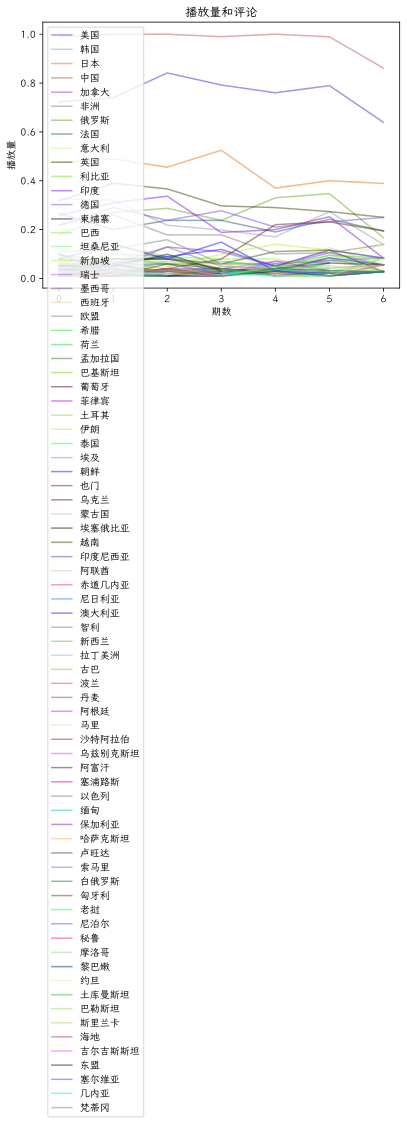

In [26]:
from numpy import random

fig, ax = plt.subplots()
ax.set_title("国家出场率")

ax.set_xlabel("百期数")
ax.set_ylabel("出场率")

for country in df.columns:
    ax.plot(
        df[country],
        label=country,
        color=random.rand(3),
        alpha=0.5,
    )
    ax.legend(loc="upper left")

# ax.plot(
#     df["中国"],
#     label="中国",
#     color=random.rand(3),
#     alpha=0.5,
# )
# ax2 = ax.twinx()

# ax2.plot(
#     df["美国"],
#     label="美国",
#     color=random.rand(3),
#     alpha=0.5,
# )

plt.show()

In [27]:
# 再画省份
df = pd.DataFrame({k: v["province"] for k, v in g1.items()}).T
df.head()


,河南,安徽,云南,重庆,北京,台湾,上海,香港,澳门,长三角,...,宁夏,广西,四川,福建,湖北,江西,湖南,浙江,天津,京津冀
0,0.227723,0.158416,0.198020,0.099010,0.455446,0.267327,0.495050,0.267327,0.049505,0.029703,...,0.039604,0.118812,0.148515,0.079208,0.188119,0.099010,0.108911,0.158416,0.118812,0.009901
1,0.150000,0.060000,0.090000,0.100000,0.420000,0.270000,0.450000,0.200000,0.040000,0.060000,...,0.070000,0.080000,0.190000,0.010000,0.110000,0.060000,0.050000,0.100000,0.160000,0.030000
2,0.217822,0.118812,0.158416,0.138614,0.485149,0.277228,0.495050,0.207921,0.029703,0.079208,...,0.049505,0.099010,0.188119,0.118812,0.128713,0.099010,0.148515,0.237624,0.118812,0.009901
3,0.188119,0.158416,0.148515,0.108911,0.396040,0.257426,0.425743,0.217822,0.079208,0.059406,...,0.019802,0.079208,0.158416,0.089109,0.079208,0.079208,0.089109,0.148515,0.148515,0.009901
4,0.210000,0.100000,0.100000,0.150000,0.440000,0.150000,0.470000,0.120000,0.010000,0.150000,...,0.030000,0.130000,0.250000,0.080000,0.120000,0.090000,0.100000,0.150000,0.100000,0.040000


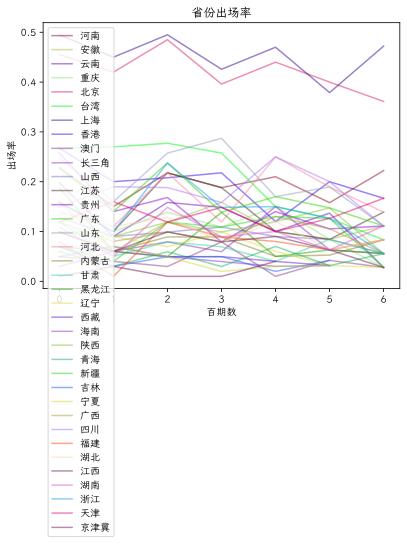

In [28]:
from numpy import random

fig, ax = plt.subplots()
ax.set_title("省份出场率")

ax.set_xlabel("百期数")
ax.set_ylabel("出场率")

for province in df.columns:
    ax.plot(
        df[province],
        label=province,
        color=random.rand(3),
        alpha=0.5,
    )
    ax.legend(loc="upper left")

# ax.plot(
#     df["中国"],
#     label="中国",
#     color=random.rand(3),
#     alpha=0.5,
# )
# ax2 = ax.twinx()

# ax2.plot(
#     df["美国"],
#     label="美国",
#     color=random.rand(3),
#     alpha=0.5,
# )

plt.show()